# Вариант 1

Обязательные требования:
1. Все графики должны быть подписаны (заголовок, оси)
2. К каждому графику должны быть представлены выводы (что вы увидели, какие зависимости, какие особенности, что тот или иной график говорит вам о данных).
3. Графики должны быть читабельными (если сделаете такой масштаб, что ничего не будет видно или все будет налазить друг на друга - это не засчитывается).

## Загрузка данных

Вам датасет о погоде за период времени с 2006 по 2016 год: `weatherHistory.csv`

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('C:\Programs\weatherHistory_var1.csv')

## График 1

Построить точечный график зависимости переменной `Temperature (C)` от `Wind Speed (km/h)` с учётом третей переменной `Precip Type`.

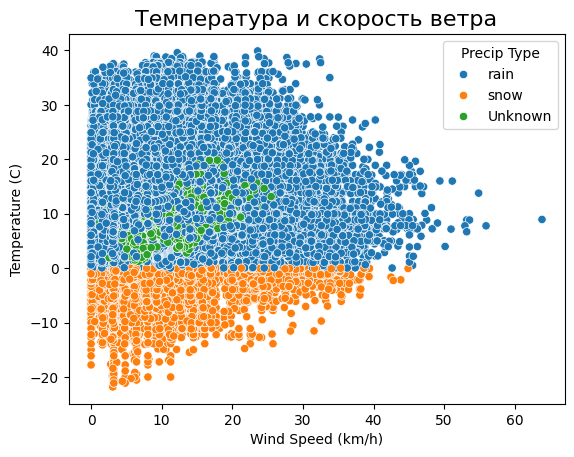

In [15]:
df['Precip Type'] = df['Precip Type'].fillna('Unknown')
sns.scatterplot(data=df, x='Wind Speed (km/h)', y='Temperature (C)', hue='Precip Type')
plt.title('Температура и скорость ветра', fontsize=16)
plt.show()

Наблюдения:
1. Точки, относящиеся к снегу, расположены в основном при низких температурах.
2. Точки, относящиеся к дождю, более равномерно распределены по диапазону температур.
3. Данные сгруппированы по определенным диапазонам скорости ветра, возможно, из-за свойств источника данных.

## График 2

Постройте 4 графика на одной фигуре, как расположить координатные плоскости - это на ваше усмотрение.

Это должны быть гистограммы для следующих переменных:
- `Precip Type`
- `Season`
- `DayOfWeek`
- `Year`

Каждый график должен быть своего цвета, также задайте цвет отличный от белого для бекграунда всей фигуры.

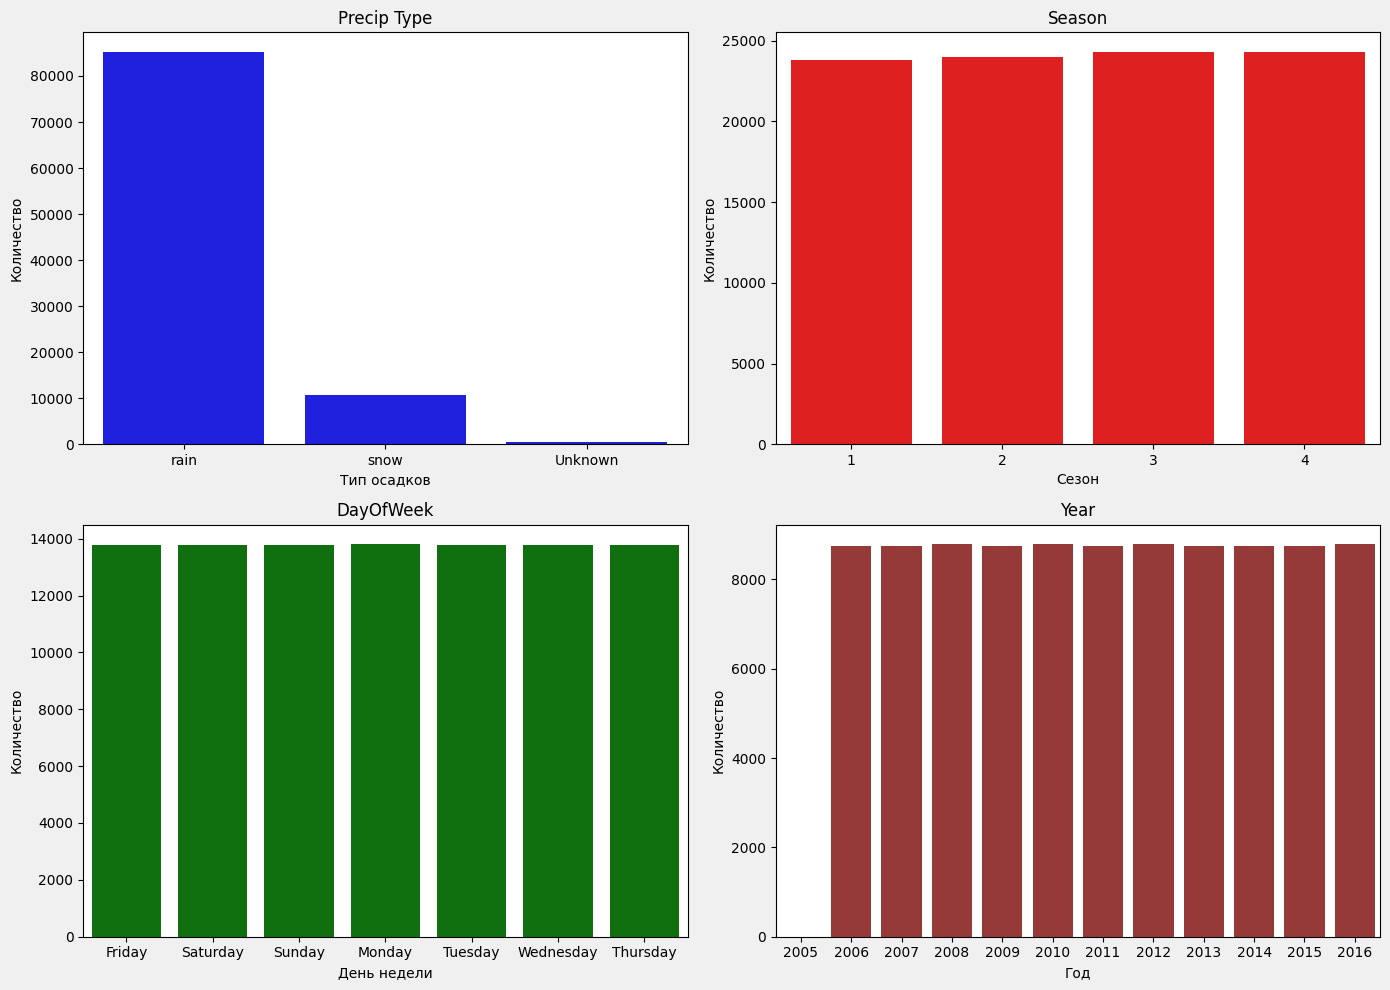

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.patch.set_facecolor('#f0f0f0')

sns.countplot(data=df, x='Precip Type', ax=axes[0, 0], palette=['blue'])
axes[0, 0].set_title('Precip Type')
axes[0, 0].set_xlabel('Тип осадков')
axes[0, 0].set_ylabel('Количество')

sns.countplot(data=df, x='Season', ax=axes[0, 1], palette=['red'])
axes[0, 1].set_title('Season')
axes[0, 1].set_xlabel('Сезон')
axes[0, 1].set_ylabel('Количество')

sns.countplot(data=df, x='DayOfWeek', ax=axes[1, 0], palette=['green'])
axes[1, 0].set_title('DayOfWeek')
axes[1, 0].set_xlabel('День недели')
axes[1, 0].set_ylabel('Количество')

sns.countplot(data=df, x='Year', ax=axes[1, 1], palette=['brown'])
axes[1, 1].set_title('Year')
axes[1, 1].set_xlabel('Год')
axes[1, 1].set_ylabel('Количество')

plt.tight_layout()
plt.show()

Precip Type:
1. Дождь встречается чаще, чем снег.
2. Присутствуют данные с неизвестным типом осадков.

Season:
1. Данные распределены по всем сезонам, с большей представленностью определенных сезонов.

Day Of Week:
1. Распределение по дням недели практически равномерное, что говорит об отсутствии смещения в сборе данных по дням.

Year:
1. Видны колебания в количестве записей за разные годы. Это может быть связано с изменениями в методах или частоте сбора данных.

## График 3

Визуализируйте матрицу корреляции в виде heatmap.

Все должно быть ЧИТАБЕЛЬНО!

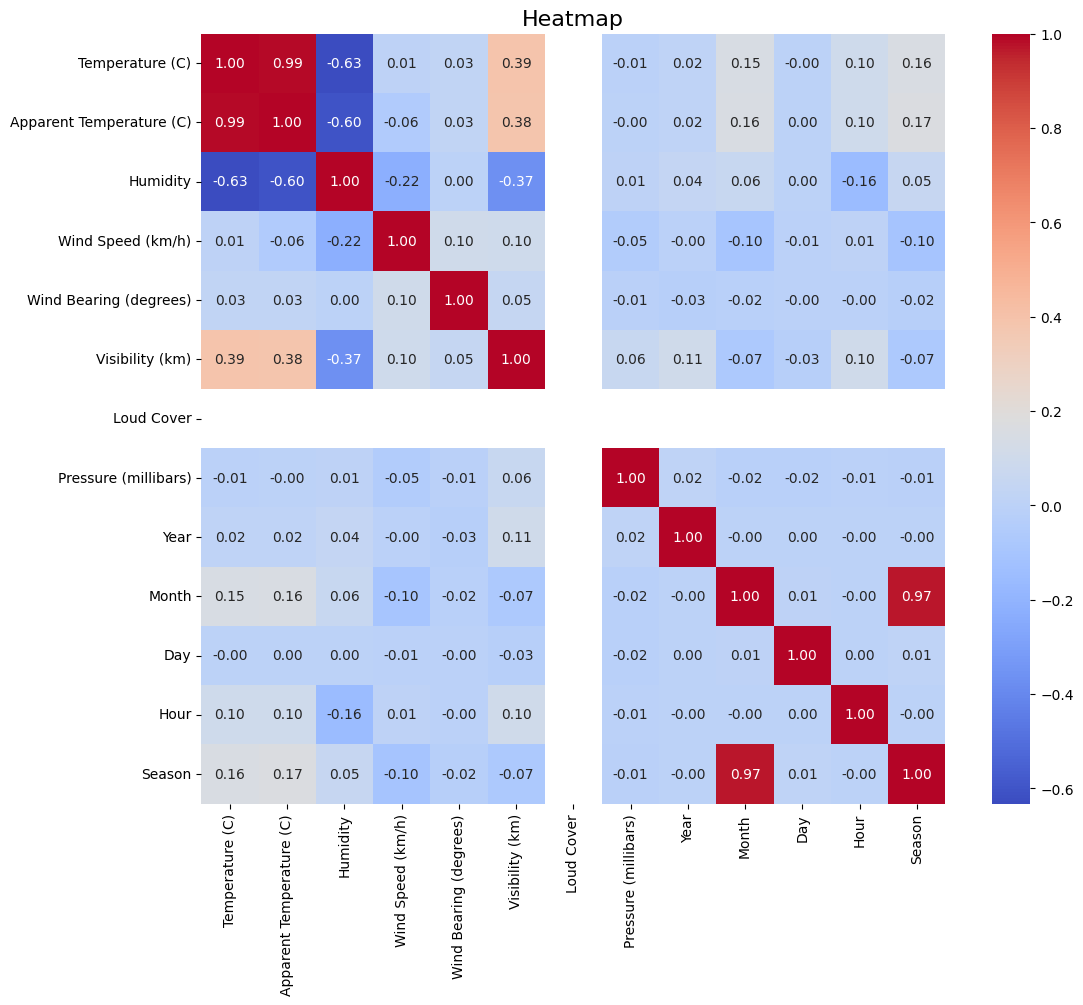

In [16]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(
    df.corr(numeric_only=True),
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm',
)

plt.title('Heatmap', fontsize=16)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

1. Temperature (C):

Высокая корреляция с Apparent Temperature (C) (ощущаемая температура), так как это взаимосвязанные величины.

2. Wind Speed (km/h):

Имеет слабую или отрицательную корреляцию с температурой, поскольку сильные ветры часто ассоциируются с холодной погодой.

3. Pressure (millibars):

Показывает слабую или умеренную связь с другими переменными, за исключением погодных изменений, например, осадков или температуры.

4. Wind Bearing (degrees):

Минимальная корреляция с другими переменными, так как это угловая величина.

## График 4

Постройте графики boxplot для следующих переменных:
- `Temperature (C)` с учетом переменной `Precip Type`
- `Pressure (millibars)` с учетом переменной `Precip Type`

Как их построить решаете самостоятельно.

Проанализируйте выборы.

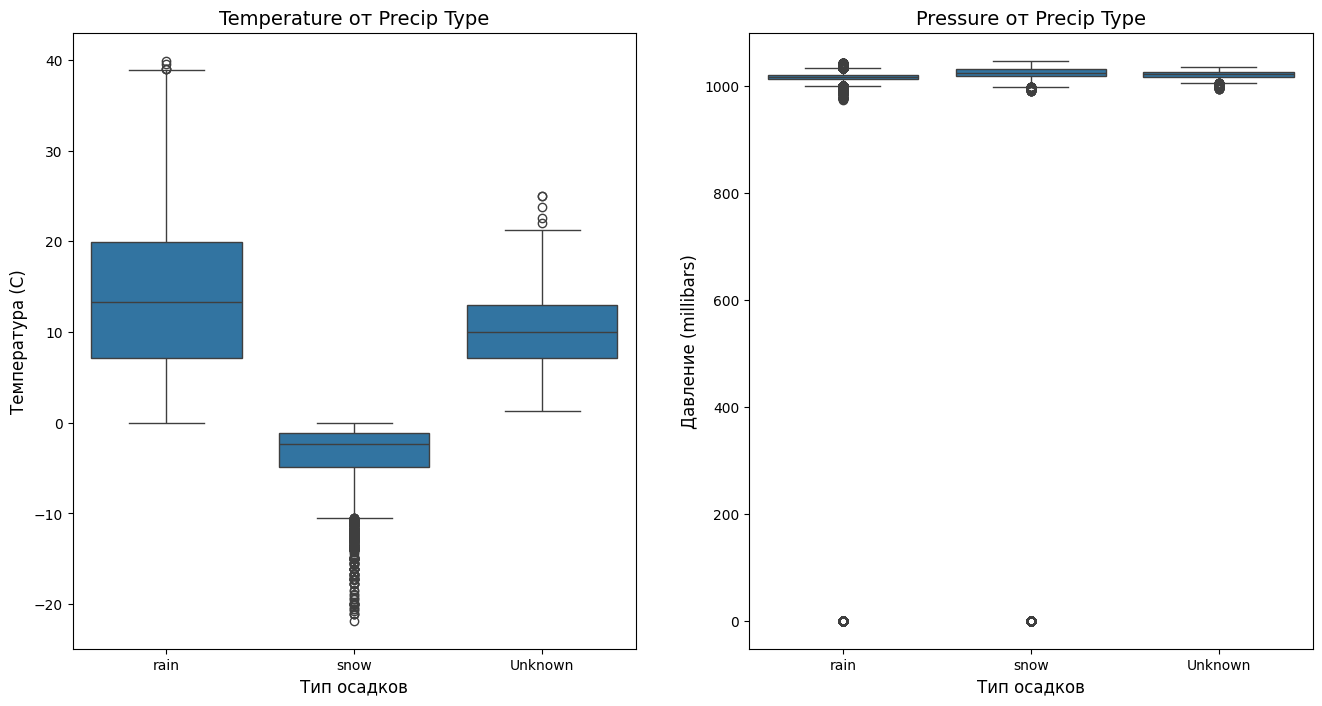

In [13]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Precip Type', y='Temperature (C)')
plt.title('Temperature от Precip Type', fontsize=14)
plt.xlabel('Тип осадков', fontsize=12)
plt.ylabel('Температура (C)', fontsize=12)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Precip Type', y='Pressure (millibars)')
plt.title('Pressure от Precip Type', fontsize=14)
plt.xlabel('Тип осадков', fontsize=12)
plt.ylabel('Давление (millibars)', fontsize=12)
plt.show()

1. Temperature (C):

Для осадков типа rain температура находится в более высоком диапазоне, в сравнении с snow.
Внутри групп можно заметить выбросы, а также медианы и межквартильный размах.

2. Pressure (millibars):

Давление показывает меньшую вариативность между типами осадков, с небольшими изменениями в медиане и диапазоне.

## График 5

Постройте график распределения переменной `Wind Bearing (degrees)` с учетом переменной `Precip Type`.

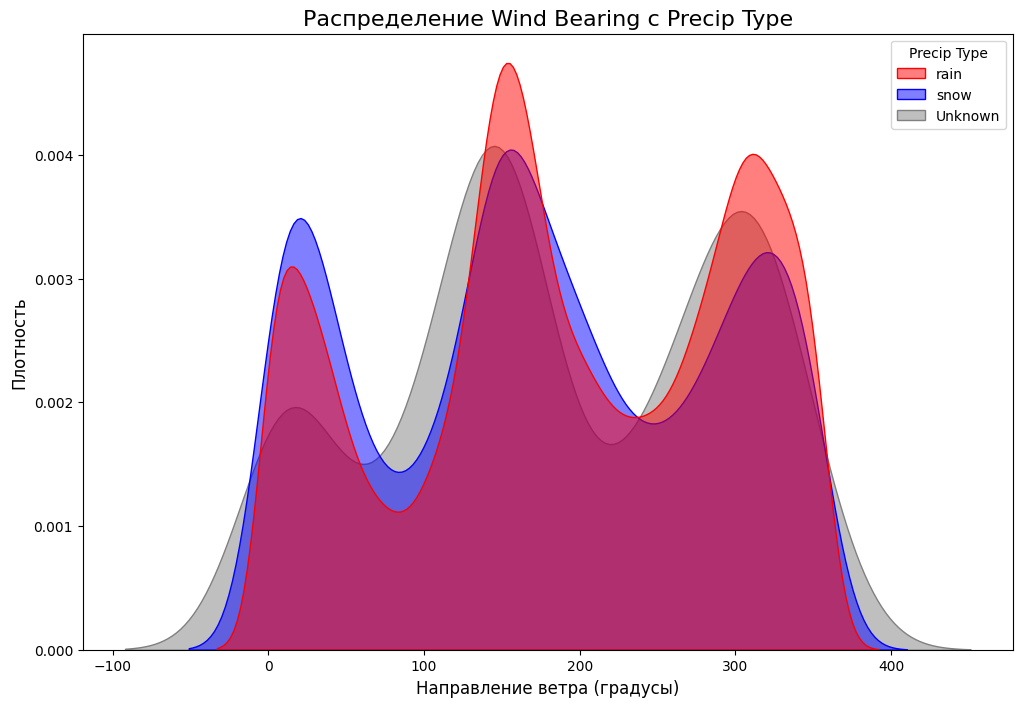

In [17]:
plt.figure(figsize=(12, 8))
sns.kdeplot(
    data=df, 
    x='Wind Bearing (degrees)', 
    hue='Precip Type', 
    fill=True, 
    common_norm=False, 
    alpha=0.5, 
    palette=["red","blue","grey"]
)
plt.title('Распределение Wind Bearing с Precip Type', fontsize=16)
plt.xlabel('Направление ветра (градусы)', fontsize=12)
plt.ylabel('Плотность', fontsize=12)
plt.show()

Общие наблюдения:

1. График отображает распределение направления ветра (Wind Bearing (degrees)) для разных типов осадков (rain, snow, unknown).
2. Осадки имеют связи с определенными направлениями ветра, это заметно как пики в определенных диапазонах.

Особенности распределения:

1. Например, для snow распределение сосредоточено в некоторых узких диапазонах направлений ветра.
2. Для rain распределение более равномерное, указывая на менее специфическую зависимость от ветра.

## График 6

Постройте график среднегодовой температуры, т.е. график зависимости года от средней температуры в этом году.

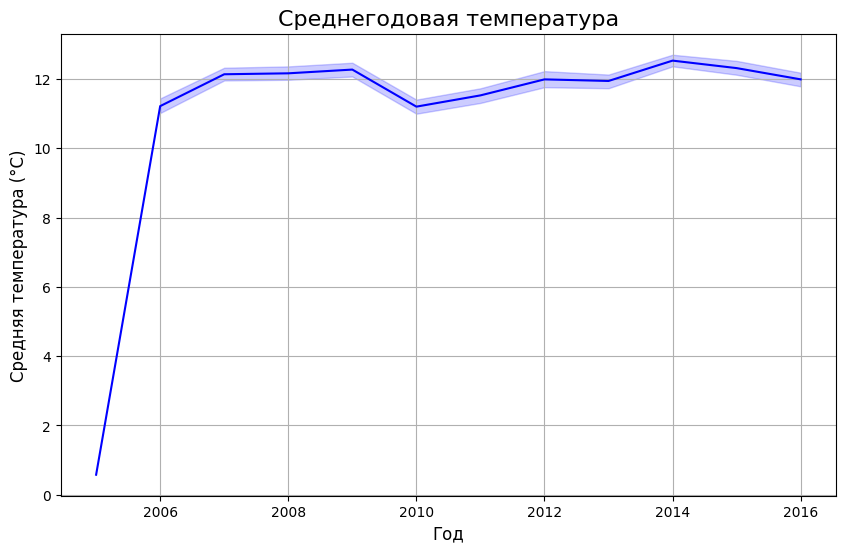

In [28]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['Year'], y=df['Temperature (C)'], color='blue')
plt.title('Среднегодовая температура', fontsize=16)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Средняя температура (°C)', fontsize=12)
plt.grid(1)
plt.show()

На графике видно изменение средней температуры по годам. Тренды могут отражать глобальные изменения климата, локальные погодные явления или систематические ошибки в измерениях.

## График 7

Найдите любой **нестандартный** график и постройте его. На ваш выбор.

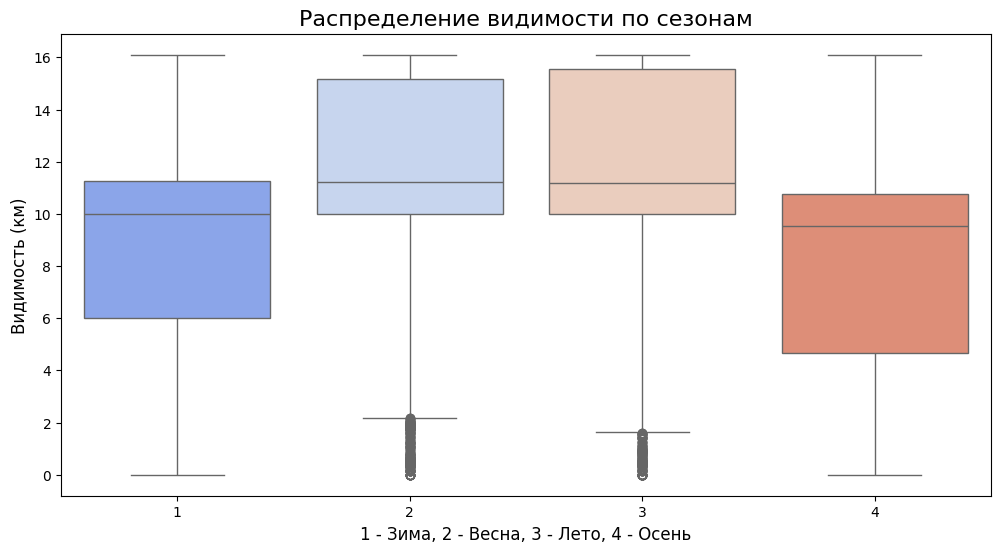

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Visibility (km)', data=df, palette='coolwarm')
plt.title('Распределение видимости по сезонам', fontsize=16)
plt.xlabel('1 - Зима, 2 - Весна, 3 - Лето, 4 - Осень', fontsize=12)
plt.ylabel('Видимость (км)', fontsize=12)
plt.show()

График демонстрирует, как видимость в километрах распределяется в зависимости от времени года. Можно заметить:

- Зимой видимость чаще ниже, вероятно, из-за снежных бурь или тумана.
- Летом и осенью видимость, как правило, выше, что связано с ясной погодой.